# Logistic Regression Classifier - Yeast Dataset

In [22]:
# Import libraries
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import joblib

# Import project modules
from src.data_loader import load_processed_data
from src.config import *

print("📈 Logistic Regression Classifier Analysis")
print("=" * 45)

📈 Logistic Regression Classifier Analysis


In [23]:
# Load the processed data
print("1. Loading processed data...")
X_train, X_test, y_train, y_test = load_processed_data()

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Load class names
label_encoder = np.load(MODELS_DIR / 'label_encoder.npy', allow_pickle=True)
class_names = label_encoder
print(f"Class names: {class_names}")

1. Loading processed data...
Training data shape: (1038, 8)
Test data shape: (446, 8)
Number of classes: 10
Class names: ['CYT' 'ERL' 'EXC' 'ME1' 'ME2' 'ME3' 'MIT' 'NUC' 'POX' 'VAC']


In [24]:
# Load the trained Logistic Regression model
print("2. Loading trained Logistic Regression model...")
model = joblib.load(MODELS_DIR / 'logistic_regression.pkl')

print(f"Model type: {type(model)}")
print(f"C parameter: {model.C}")
print(f"Penalty: {model.penalty}")
print(f"Solver: {model.solver}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print(f"Predictions shape: {y_pred.shape}")
print(f"Prediction probabilities shape: {y_pred_proba.shape}")

2. Loading trained Logistic Regression model...
Model type: <class 'sklearn.linear_model._logistic.LogisticRegression'>
C parameter: 100
Penalty: l1
Solver: liblinear
Predictions shape: (446,)
Prediction probabilities shape: (446, 10)


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [25]:
# Model Performance Analysis
print("3. Model Performance Analysis")
print("=" * 30)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

3. Model Performance Analysis
Accuracy: 0.5830
Precision: 0.5854
Recall: 0.5830
F1-Score: 0.5678

Detailed Classification Report:
              precision    recall  f1-score   support

         CYT       0.50      0.73      0.59       139
         ERL       0.67      1.00      0.80         2
         EXC       0.50      0.18      0.27        11
         ME1       0.71      0.77      0.74        13
         ME2       0.71      0.33      0.45        15
         ME3       0.76      0.86      0.81        49
         MIT       0.58      0.52      0.55        73
         NUC       0.63      0.44      0.52       129
         POX       0.75      0.50      0.60         6
         VAC       0.00      0.00      0.00         9

    accuracy                           0.58       446
   macro avg       0.58      0.53      0.53       446
weighted avg       0.59      0.58      0.57       446



/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13

4. Confusion Matrix


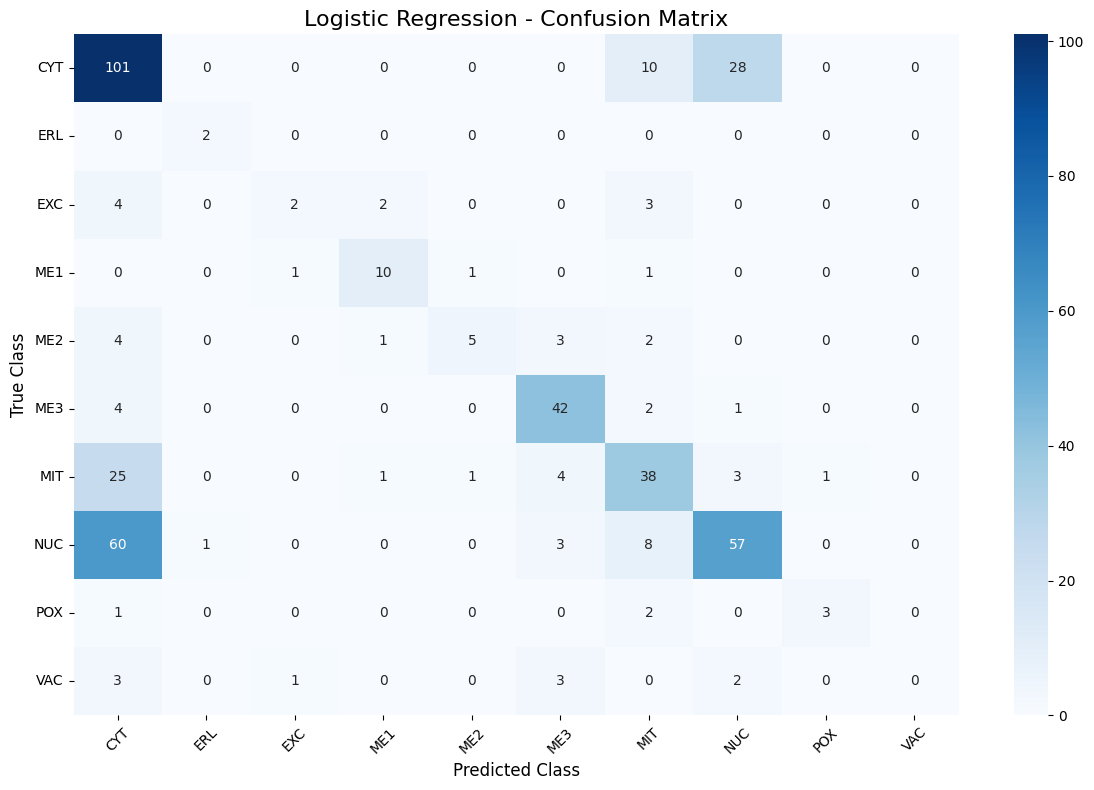


Per-class Accuracy:
CYT: 0.727
ERL: 1.000
EXC: 0.182
ME1: 0.769
ME2: 0.333
ME3: 0.857
MIT: 0.521
NUC: 0.442
POX: 0.500
VAC: 0.000


In [26]:
# Confusion Matrix Visualization
print("4. Confusion Matrix")
print("=" * 20)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Logistic Regression - Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nPer-class Accuracy:")
for i, (class_name, acc) in enumerate(zip(class_names, class_accuracy)):
    print(f"{class_name}: {acc:.3f}")

5. Coefficient Analysis


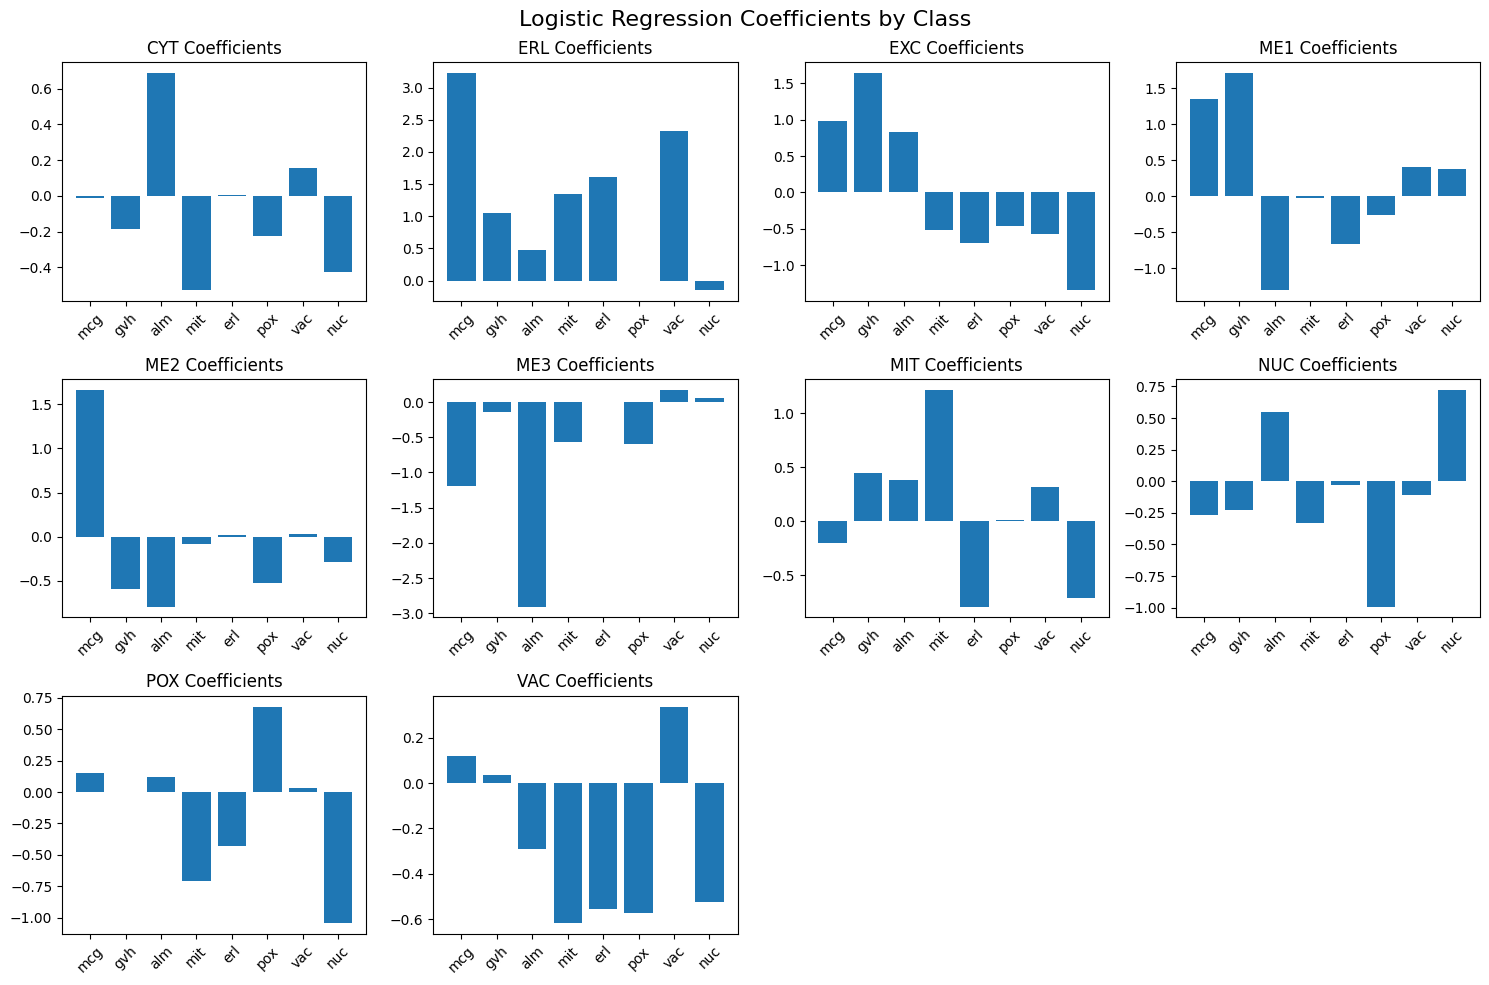


Most important features for each class:

CYT:
  alm: 0.6876
  mit: -0.5276
  nuc: -0.4273

ERL:
  mcg: 3.2231
  vac: 2.3172
  erl: 1.6125

EXC:
  gvh: 1.6415
  nuc: -1.3423
  mcg: 0.9799

ME1:
  gvh: 1.7118
  mcg: 1.3486
  alm: -1.2998

ME2:
  mcg: 1.6642
  alm: -0.7918
  gvh: -0.5958

ME3:
  alm: -2.9067
  mcg: -1.1940
  pox: -0.5940

MIT:
  mit: 1.2145
  erl: -0.7901
  nuc: -0.7121

NUC:
  pox: -0.9920
  nuc: 0.7231
  alm: 0.5509

POX:
  nuc: -1.0452
  mit: -0.7074
  pox: 0.6812

VAC:
  mit: -0.6171
  pox: -0.5739
  erl: -0.5561


In [27]:
# Coefficient Analysis
print("5. Coefficient Analysis")
print("=" * 25)

# Get coefficients for each class
feature_names = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']
coefficients = model.coef_

# Plot coefficients for each class
plt.figure(figsize=(15, 10))
for i, class_name in enumerate(class_names):
    plt.subplot(3, 4, i+1)
    plt.bar(feature_names, coefficients[i])
    plt.title(f'{class_name} Coefficients')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Logistic Regression Coefficients by Class', fontsize=16)
plt.tight_layout()
plt.show()

# Show most important features for each class
print("\nMost important features for each class:")
for i, class_name in enumerate(class_names):
    coef_abs = np.abs(coefficients[i])
    top_features = np.argsort(coef_abs)[-3:][::-1]
    print(f"\n{class_name}:")
    for idx in top_features:
        print(f"  {feature_names[idx]}: {coefficients[i][idx]:.4f}")

6. Learning Curves Analysis


/opt/homebrew/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/linear_mo

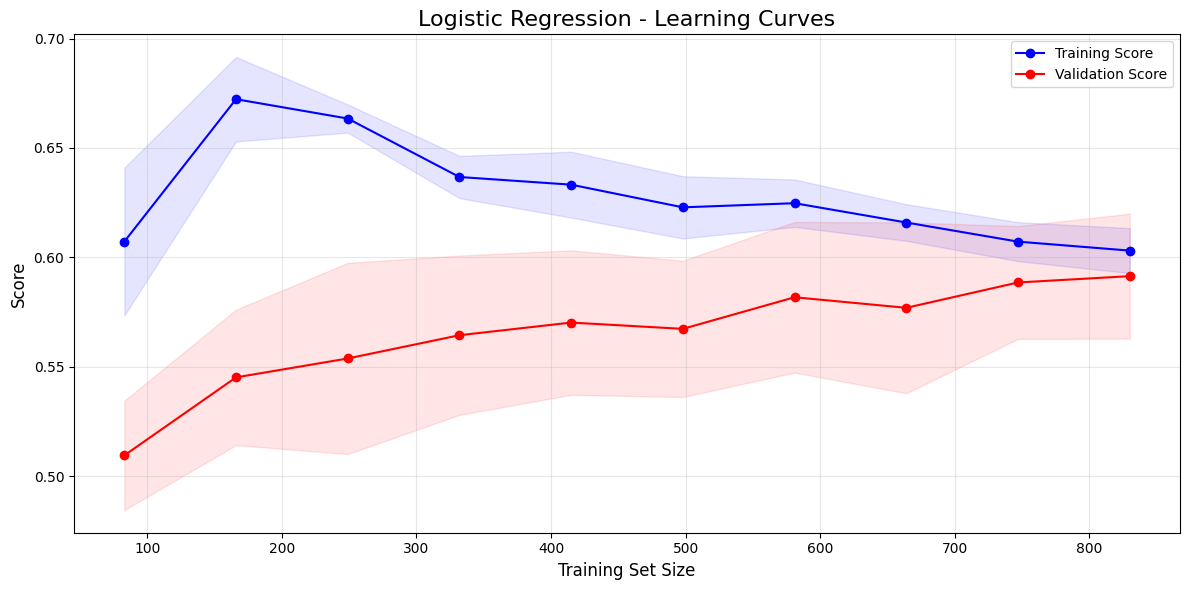

Final training score: 0.6031 ± 0.0103
Final validation score: 0.5915 ± 0.0285


In [28]:
# Learning Curves
print("6. Learning Curves Analysis")
print("=" * 30)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Score', color='red')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

plt.title('Logistic Regression - Learning Curves', fontsize=16)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training score: {train_mean[-1]:.4f} ± {train_std[-1]:.4f}")
print(f"Final validation score: {val_mean[-1]:.4f} ± {val_std[-1]:.4f}")